In [1]:
from sklearn.decomposition import FastICA

In [2]:
from materials import *
from direct import *

In [3]:
DIRECT_GRID.fit(TRAIN_DATA[["angle","ratio","p_matrix","p_fiber"]],TRAIN_DATA[["p11","p22","p12"]])

Fitting 5 folds for each of 105 candidates, totalling 525 fits


[CV 3/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=4091.794, test=3979.539) R2: (train=0.394, test=0.380) total time=   0.1s
[CV 1/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=4018.222, test=4184.282) R2: (train=0.391, test=0.399) total time=   0.2s
[CV 4/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=4078.843, test=4027.164) R2: (train=0.391, test=0.393) total time=   0.2s
[CV 2/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); MSE: (train=4068.012, test=3978.976) R2: (train=0.393, test=0.393) total time=   0.3s
[CV 1/5] END preprocessing=PCA(), preprocessing__n_components=3, regressor=LinearRegression(); MSE: (train=3962.940, test=4135.522) R2: (train=0.398, test=0.406) total time=   0.2s
[CV 5/5] END preprocessing=PCA(), preprocessing__n_components=2, regressor=LinearRegression(); 

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('preprocessing', 'passthrough'),
                                       ('regressor', 'passthrough')]),
             n_jobs=-1,
             param_grid=[{'preprocessing': [PCA(), FastICA()],
                          'preprocessing__n_components': [2, 3, 4],
                          'regressor': [LinearRegression(),
                                        DecisionTreeRegressor()]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f5...
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]},
                         {'preprocessing': [FunctionTransformer(func=<function <lambda> at 0x7f5590e57c40>)],
                          'regressor': [RandomForestRegressor()],
                          'regressor__n_estimators': [5, 20, 50]}],
             refit='R2', return_train_score=True,
             scoring={'MSE': make_scorer(mean_squared_error),
                      'R2': make_scorer(r2_score)},
             verbose=4)

In [4]:
DIRECT_GRID.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('preprocessing', FastICA(n_components=4)),
                ('regressor',
                 KNeighborsRegressor(n_neighbors=4, weights='distance'))])

/tmp/ipykernel_62714/4130949356.py:56: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  graph_p12.set_xlim([-15, 5])
/tmp/ipykernel_62714/4130949356.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  graph_p12.set_ylim([-15, 5])
/tmp/ipykernel_62714/4130949356.py:76: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  graph_p11.set_xlim([0, 1000])
/tmp/ipykernel_62714/4130949356.py:77: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  graph_p11.set_ylim([0, 1000])
/tmp/ipykernel_62714/4130949356.py:96: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  graph_p22.set_xlim([0, 1000])
/tmp/ipykernel_62714/4130949356.py:97: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  graph_p22.set_ylim([0, 1000])


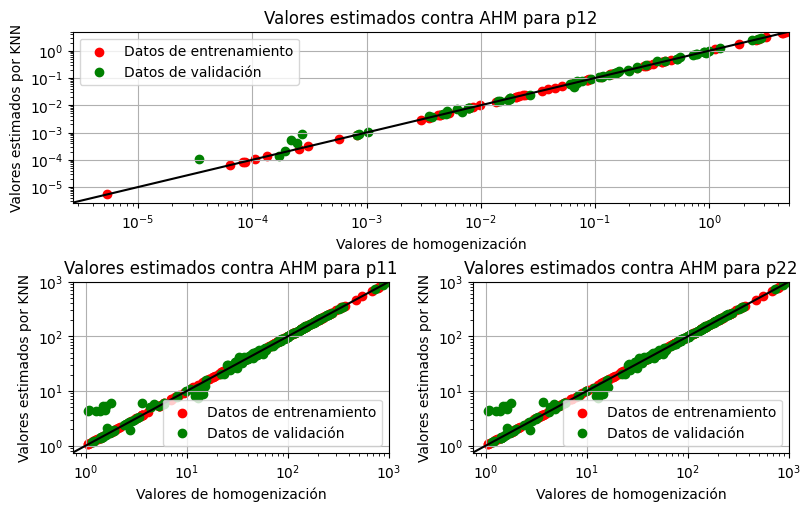

In [30]:
_, TRAIN_SAMPLES = train_test_split(TRAIN_DATA, test_size=200, random_state=13)
# TRAIN_SAMPLES=TRAIN_DATA

_, VALIDATION_SAMPLES = train_test_split(
    VALIDATION_DATA, test_size=200, random_state=13
)
# VALIDATION_SAMPLES=VALIDATION_DATA

# Draw graph with comparison of predicted vs AHM values for train and validation data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5), layout="constrained")

graph_p12 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
graph_p12.grid(True)
graph_p12.set_xscale("log", nonpositive="clip")
graph_p12.set_yscale("log", nonpositive="clip")

graph_p11 = plt.subplot2grid((2, 2), (1, 0))
graph_p11.grid(True)
graph_p11.set_xscale("log", nonpositive="clip")
graph_p11.set_yscale("log", nonpositive="clip")

graph_p22 = plt.subplot2grid((2, 2), (1, 1))
graph_p22.grid(True)
graph_p22.set_xscale("log", nonpositive="clip")
graph_p22.set_yscale("log", nonpositive="clip")


x_train, y_train = (TRAIN_SAMPLES), (
    DIRECT_GRID.predict(TRAIN_SAMPLES[["angle", "ratio", "p_matrix", "p_fiber"]])
)

x_validation, y_validation = (VALIDATION_SAMPLES), (
    DIRECT_GRID.predict(VALIDATION_SAMPLES[["angle", "ratio", "p_matrix", "p_fiber"]])
)

graph_p12.scatter(
    x_train["p12"],
    y_train[:, 2],
    color="red",
    label="Datos de entrenamiento",
)
graph_p12.scatter(
    x_validation["p12"],
    y_validation[:, 2],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p12.plot([-15, 5], [-15, 5], color="black")

# Limit x and y to the range between -40 and 10
graph_p12.set_xlim([-15, 5])
graph_p12.set_ylim([-15, 5])

graph_p11.scatter(
    x_train["p11"],
    y_train[:, 0],
    color="red",
    label="Datos de entrenamiento",
)
graph_p11.scatter(
    x_validation["p11"],
    y_validation[:, 0],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p11.plot([0, 1000], [0, 1000], color="black")

# Limit x and y to the range between 0 and 1000
graph_p11.set_xlim([0, 1000])
graph_p11.set_ylim([0, 1000])

graph_p22.scatter(
    x_train["p22"],
    y_train[:, 1],
    color="red",
    label="Datos de entrenamiento",
)
graph_p22.scatter(
    x_validation["p22"],
    y_validation[:, 1],
    color="green",
    label="Datos de validación",
)

# Plot a line for the 1:1 relationship
graph_p22.plot([0, 1000], [0, 1000], color="black")

# Limit x and y to the range between 0 and 1000
graph_p22.set_xlim([0, 1000])
graph_p22.set_ylim([0, 1000])


graph_p12.set_xlabel("Valores de homogenización")
graph_p12.set_ylabel("Valores estimados por KNN")
graph_p12.set_title("Valores estimados contra AHM para p12")

graph_p11.set_xlabel("Valores de homogenización")
graph_p11.set_ylabel("Valores estimados por KNN")
graph_p11.set_title("Valores estimados contra AHM para p11")

graph_p22.set_xlabel("Valores de homogenización")
graph_p22.set_ylabel("Valores estimados por KNN")
graph_p22.set_title("Valores estimados contra AHM para p22")

graph_p12.legend()
graph_p11.legend()
graph_p22.legend()

plt.show()

In [6]:
import pandas as pd

rows = [v for k, v in GRID.cv_results_.items() if k.startswith("split") and "_test_" in k and k.endswith("R2")]

df=pd.DataFrame(
    [list(row) for row in zip(*rows)],
    columns=["split" + str(i) for i in range(5)],
    index=[get_pipe_name(pipe) for pipe in GRID.cv_results_["params"]],
    dtype=float
)

df

NameError: name 'GRID' is not defined

In [ ]:
print(df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & split0 & split1 & split2 & split3 & split4 \\
\midrule
PCA2 + Regresión lineal & 0.390767 & 0.400689 & 0.386267 & 0.389832 & 0.387017 \\
PCA2 + Árbol de decisión & 0.195604 & 0.139543 & 0.149236 & 0.137668 & 0.160395 \\
PCA3 + Regresión lineal & 0.396987 & 0.406970 & 0.392270 & 0.396824 & 0.393396 \\
PCA3 + Árbol de decisión & 0.856504 & 0.858855 & 0.836528 & 0.854286 & 0.852173 \\
PCA4 + Regresión lineal & 0.634732 & 0.638080 & 0.639087 & 0.636793 & 0.638365 \\
PCA4 + Árbol de decisión & 0.985308 & 0.985861 & 0.984655 & 0.988367 & 0.988983 \\
ICA2 + Regresión lineal & 0.390767 & 0.400689 & 0.386267 & 0.389832 & 0.387017 \\
ICA2 + Árbol de decisión & 0.276482 & 0.228145 & 0.289074 & 0.364720 & 0.418241 \\
ICA3 + Regresión lineal & 0.396987 & 0.406970 & 0.392270 & 0.396824 & 0.393396 \\
ICA3 + Árbol de decisión & 0.903516 & 0.902716 & 0.900086 & 0.910706 & 0.905734 \\
ICA4 + Regresión lineal & 0.634732 & 0.638080 & 0.639087 & 0.636793 & 0.638365 \\
IC